# CLASSIFICATION MODEL FOR SIDE EFFECTS OF A DRUG

# 

A side effect is usually regarded as an undesirable secondary effect which occurs in addition to the desired therapeutic effect of a drug or medication. Side effects may vary for each individual depending on the person's disease state, age, weight, gender, ethnicity and general health.
The objective of this project is to build a classification model that classifies the side effects of a particular drug by age,gender,and race.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
from random import randrange
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
import warnings
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import string
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

In [2]:
# Loading dataset

data1 = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\tcs\webmd.csv")
data1.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [3]:
# Checking the dimension of the dataset

data1.shape

(362806, 12)

Since we are expected to create a dataset of 4,00,000 patients.we are going to add some fake data using faker.

In [4]:
no_customers = 40000
fake = Faker('de_DE')
customers = []

In [5]:
for customers_id in range(no_customers):
    Age = random.choice(["55-64","55-64","65-74","45-54"])
    Condition = random.choice(["Other","Pain","High Blood Pressure","Depression","Birth Control"])
    d1 = datetime.strptime(f'1/1/2004', '%m/%d/%Y')
    d2 = datetime.strptime(f'8/10/2014', '%m/%d/%Y')
    Date = fake.date_between(d1, d2)
    Drug = random.choice(["cymbalta","lisinopril","lisinopril solution","celexa","lyrica","chantix","lexapro","midol complete","minocycline hcl",
                          "hydrocodone-acetaminophen","cabergoline","phentermine hcl","metformin hcl","metadate cd","microgestin"])
    DrugId = random.randint(147700,158800)
    EaseofUse = random.randint(2,5)
    Effectiveness = random.randint(1,5)
    Reviews = random.choice(["good ","good ","good ","good ","good","good ","good","this treatment is awsome.  I love drugs.","This drug is awesome.  I love drugs."])
    Satisfaction = random.randint(1,5)
    Sex = random.choice(["Male", "Female"])
    Sides = random.choice(["Nausea ,  dry mouth ,  constipation ","Nausea ,  vomiting ,  constipation ,  lightheadedness",
                           "Drowsiness,  dizziness","Dizziness ,  lightheadedness , tiredness, or  headache","Dizziness ,  lightheadedness , tiredness"])
    UsefulCount =  random.randint(0,16)
    customers.append([Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount])
    
data2 = pd.DataFrame(customers, columns=['Age','Condition','Date','Drug','DrugId','EaseofUse','Effectiveness','Reviews','Satisfaction','Sex','Sides','UsefulCount']) 
data2.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,45-54,Other,2013-12-01,metadate cd,153370,2,1,good,1,Male,"Drowsiness, dizziness",13
1,55-64,Depression,2013-06-08,metadate cd,149272,4,5,good,4,Male,"Dizziness , lightheadedness , tiredness, or ...",11
2,55-64,Pain,2005-04-27,metformin hcl,154360,3,5,This drug is awesome. I love drugs.,3,Female,"Nausea , dry mouth , constipation",14
3,55-64,Birth Control,2006-04-27,hydrocodone-acetaminophen,153043,4,1,good,3,Male,"Drowsiness, dizziness",11
4,45-54,Birth Control,2005-06-29,cymbalta,148604,4,1,good,5,Female,"Dizziness , lightheadedness , tiredness",0


In [6]:
# dimension of created dataset
data2.shape

(40000, 12)

In [7]:
# Connecting orginal dataset and created dataset

data3 = pd.concat([data1, data2],axis=0,ignore_index=True)
data3.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [8]:
# Dimension of New dataset
data3.shape

(402806, 12)

# Name and Race column addition

In [9]:
pip install mimesis


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
from mimesis import Person
person = Person('en')

# defining function to create names for each rows

def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name

names = fake_names(402806)

data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])


In [11]:
# Creating race columns 

options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]
words = []

for i in range(402806):
    word = random.choices([o[0] for o in options], [o[1] for o in options])[0]
    words.append(word)

data_race=pd.DataFrame(words, columns = ['Race'])


In [12]:
data = pd.concat([data_name, data_race, data3], axis=1).reindex(data3.index)
data.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Noe,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Booker,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Jorge,Black,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Lakita,Black,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Dannielle,Black,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [13]:
# Dimension of Final data set
data.shape

(402806, 14)

# Dataset is  now ready for EDA and Preprocessing

In [14]:
# Basic data exploration

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402806 entries, 0 to 402805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           402806 non-null  object
 1   Race           402806 non-null  object
 2   Age            402806 non-null  object
 3   Condition      402806 non-null  object
 4   Date           402806 non-null  object
 5   Drug           402806 non-null  object
 6   DrugId         402806 non-null  int64 
 7   EaseofUse      402806 non-null  int64 
 8   Effectiveness  402806 non-null  int64 
 9   Reviews        402769 non-null  object
 10  Satisfaction   402806 non-null  int64 
 11  Sex            402806 non-null  object
 12  Sides          402806 non-null  object
 13  UsefulCount    402806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 43.0+ MB


In [15]:
data["Satisfaction"] = data["Satisfaction"].astype(int)

In [16]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,402806.000000,402806.000000,402806.000000,402806.000000,402806.000000
mean,48432.641485,3.968188,3.480380,3.122362,6.868651
std,60876.998667,1.308377,1.460292,1.592932,8.989805
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5219.000000,3.000000,2.000000,1.000000,1.000000
50%,11285.000000,5.000000,4.000000,3.000000,4.000000
75%,91515.000000,5.000000,5.000000,5.000000,10.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [17]:
data.nunique()

Name               3323
Race                  4
Age                  12
Condition          1806
Date               8398
Drug               7093
DrugId            16146
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1656
UsefulCount         148
dtype: int64

 Generating Year column 

In [18]:
data['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year

In [19]:
data.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
0,Noe,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,2014
1,Booker,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,2011
2,Jorge,Black,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,2012
3,Lakita,Black,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,2010
4,Dannielle,Black,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,2009


In [20]:
# Checking null values

data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
Year              0
dtype: int64

## Number of reviews collected in each year

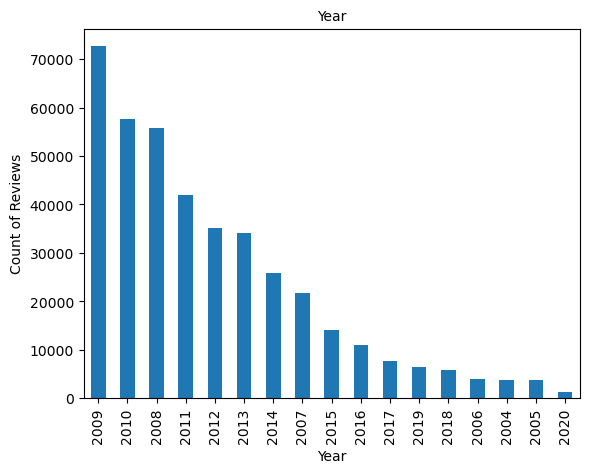

In [21]:
data['Year'].value_counts().plot(kind='bar')
plt.title("Year", fontsize = 10)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Count of Reviews", fontsize = 10)
plt.show()

The year 2009 tops the list and there is a gradual decrease in user reviews

## Top 20 Drugs based on No. of Users

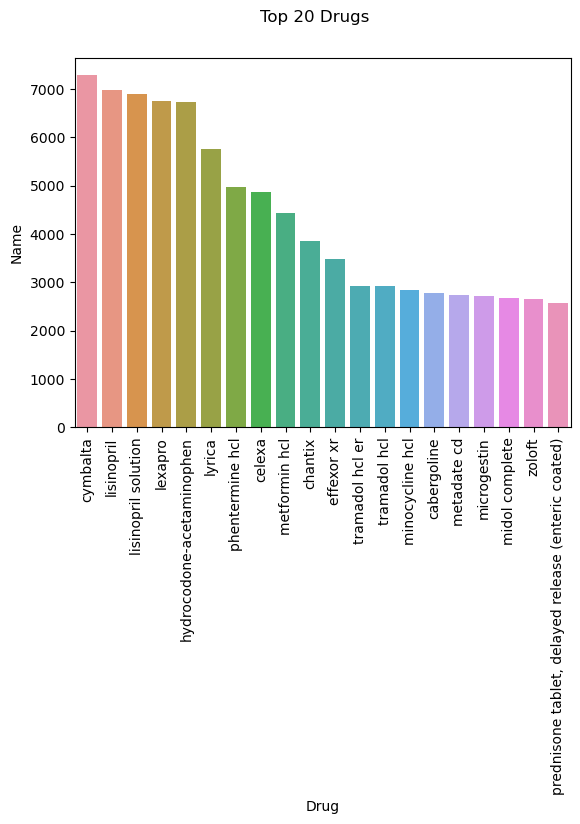

In [22]:
data_= data['Drug'].value_counts().head(20).reset_index()
data_.columns = ['Drug', 'Name']
sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

Cymbalta drug tops the list followed by Lisinopril.All the top 20 drugs has been used by more than 2000 people

## Top 15 Conditions

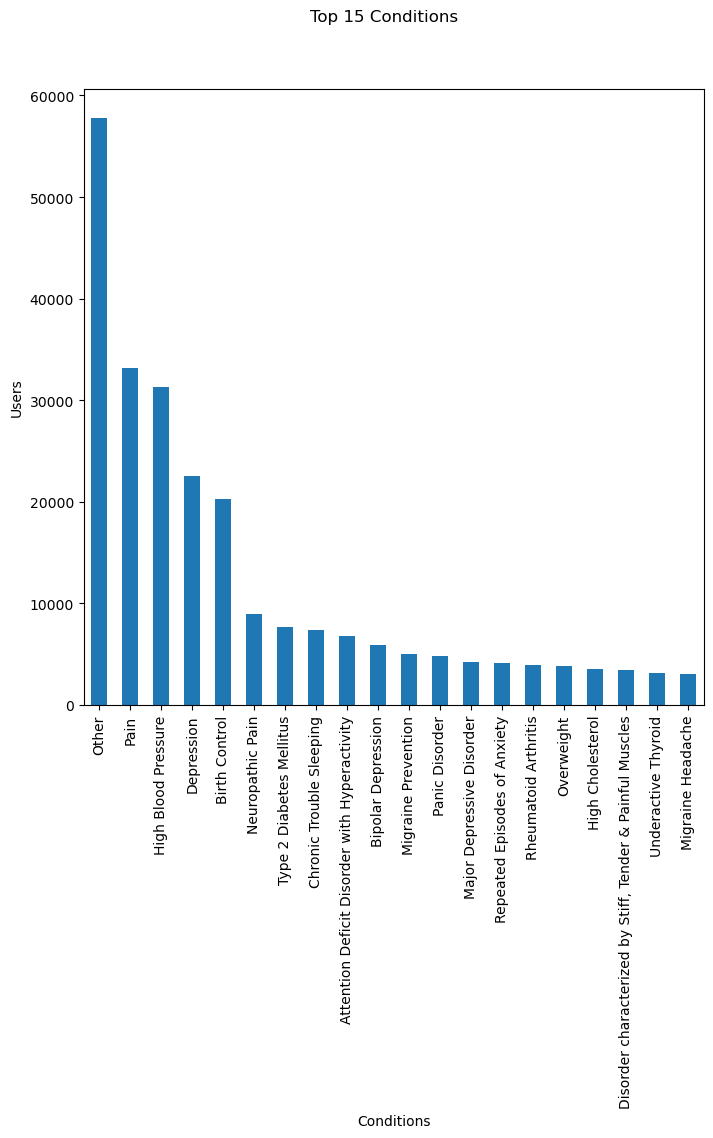

In [23]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 15 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')
plt.show()

More than 50,000 users have reported other conditions followed by Pain and 
High blood pressure are topped the list with more than 30000 people reporting it.Also nearly 22,000 user's have reported depression.

## Side effects and Drug

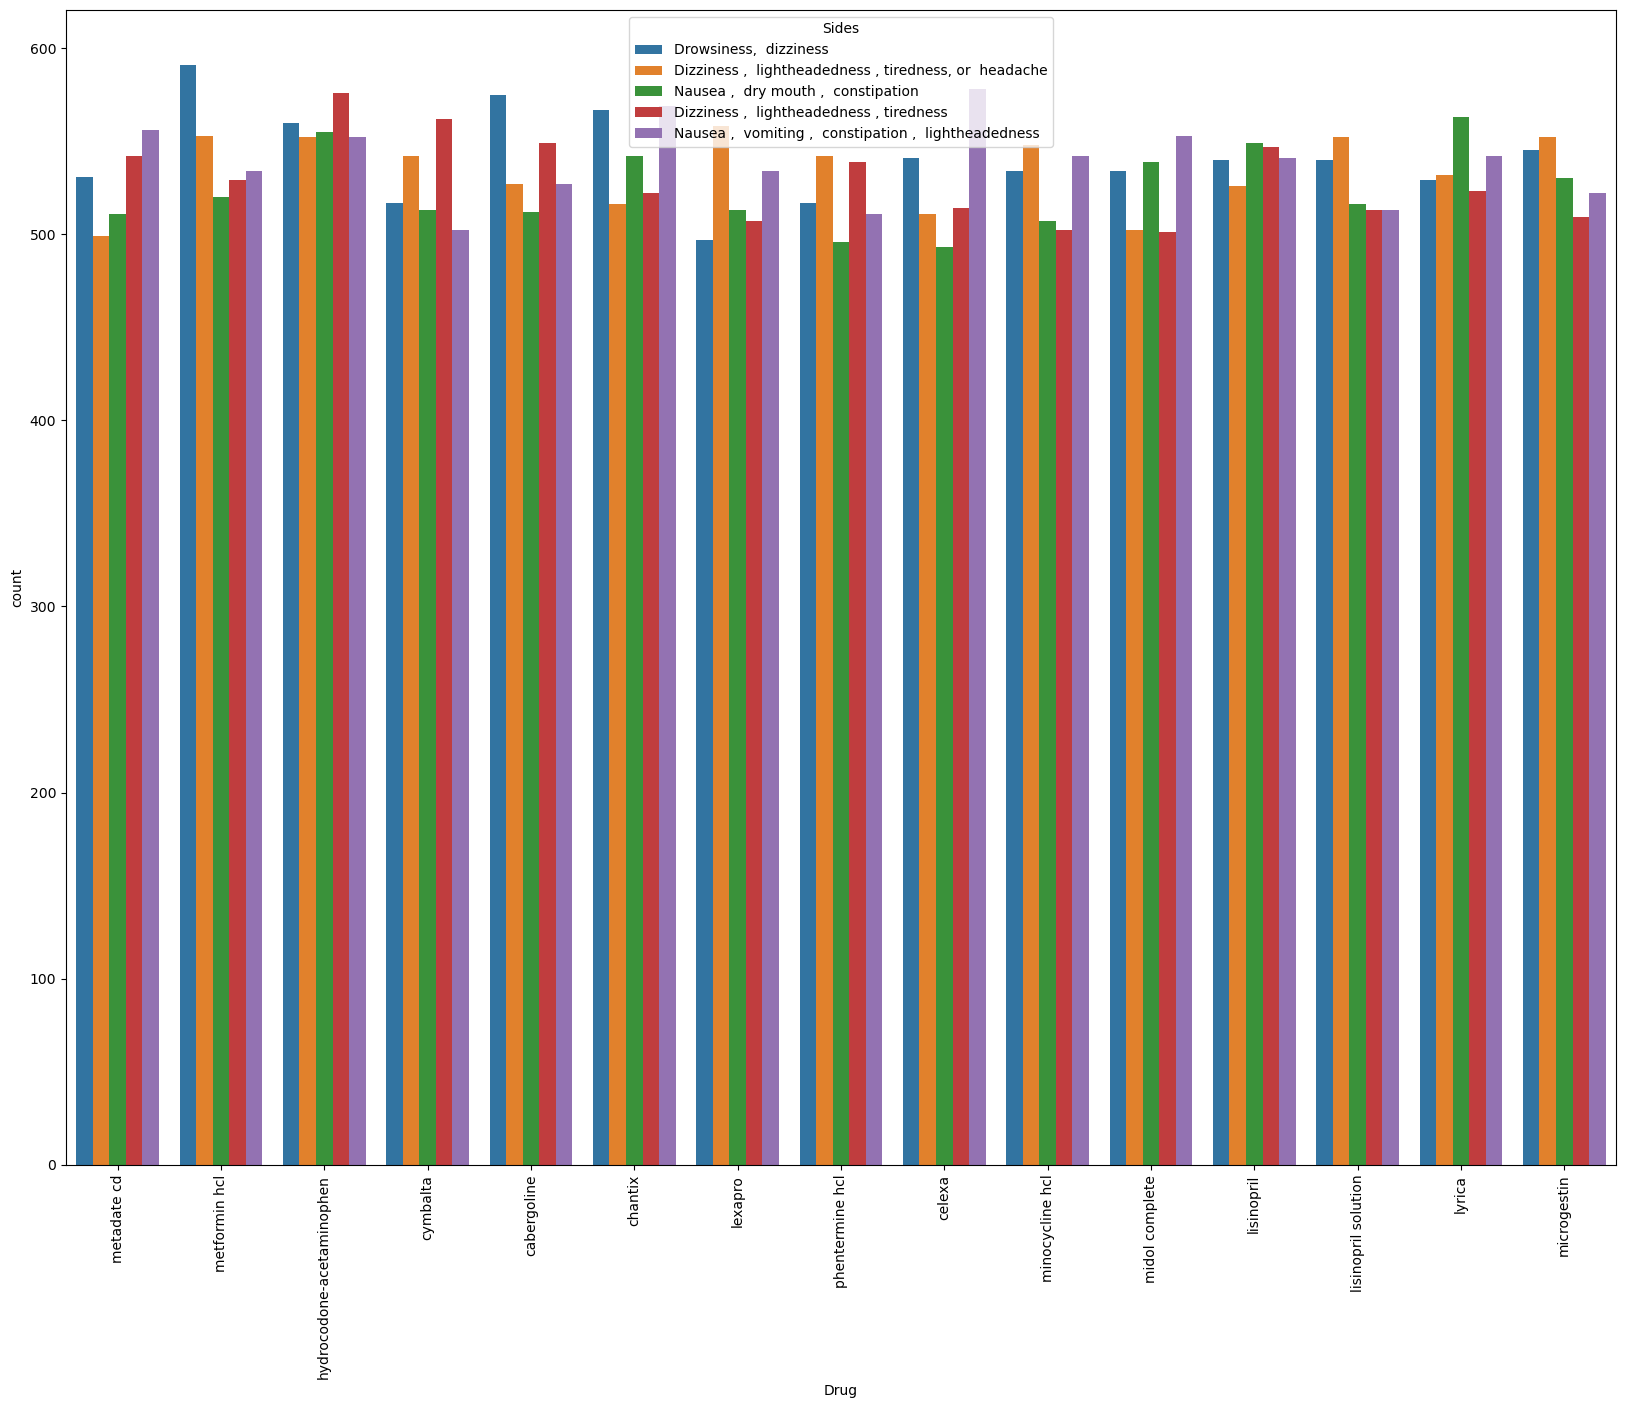

In [24]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Drug',hue='Sides',data=data2)
plt.xticks(rotation=90,fontsize=10)
plt.show()

Almost all the drug have reported extreme side effects.Most of the drugs having more than 500 counts for each side effects.

## From the above charts,A drug named Lisinopril Solution is selected for building a classification model to determine side effects.

In [25]:
ldata=data[data.Drug == "lisinopril solution"]
ldata.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
9197,Dillon,Hispanic,,High Blood Pressure,2/29/2020,lisinopril solution,6873,5,5,No Script or health Insurance needed to place ...,5,,"Dizziness , lightheadedness , tiredness, or ...",14,2020
9203,Richard,White,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873,5,4,I have developed a very itch rash on my body f...,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3,2020
9209,Quinton,Hispanic,55-64,High Blood Pressure,1/14/2020,lisinopril solution,6873,4,5,"tried alternative medicine Beet root, hibiscus...",4,Male,"Dizziness , lightheadedness , tiredness, or ...",3,2020
9215,Marcelo,White,65-74,High Blood Pressure,10/17/2019,lisinopril solution,6873,5,5,Have been taking 10 mg doses per day for over ...,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6,2019
9221,Jann,White,55-64,High Blood Pressure,10/13/2019,lisinopril solution,6873,2,4,I don't like that I'm taking this and not know...,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12,2019


## EDA on LICINOPRIL SOLUTION

In [26]:
ldata.shape

(6903, 15)

In [27]:
# drop duplicated row
ldata.drop_duplicates(inplace=True, keep='first')

In [28]:
# Missing Value Handling
ldata.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          2
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
Year             0
dtype: int64

In [29]:
# Nan rows were dropped
ldata.dropna(axis = 0, inplace = True)
ldata.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
Year             0
dtype: int64

In [30]:
# Handling instances with whitespaces
for i in ldata:
    ldata[i]=np.where(ldata[i]==" ",np.NAN,ldata[i])
    
ldata.isna().sum()

Name               0
Race               0
Age              135
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          781
Satisfaction       0
Sex              247
Sides              0
UsefulCount        0
Year               0
dtype: int64

In [31]:
# Handling instances with double whitespaces
for i in ldata:
    ldata[i]=np.where(ldata[i]=="  ",np.NAN,ldata[i])
    
ldata.isna().sum()

Name               0
Race               0
Age              135
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          781
Satisfaction       0
Sex              247
Sides              0
UsefulCount        0
Year               0
dtype: int64

checking each columns and unique values

In [32]:
ldata.Sex.value_counts()

Female    3711
Male      2943
Name: Sex, dtype: int64

In [33]:
ldata.Age.value_counts()

55-64         2470
45-54         1798
65-74         1432
35-44          531
75 or over     331
25-34          171
19-24           28
13-18            3
0-2              1
7-12             1
Name: Age, dtype: int64

In [34]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6901 entries, 9197 to 402802
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           6901 non-null   object 
 1   Race           6901 non-null   object 
 2   Age            6766 non-null   object 
 3   Condition      6901 non-null   object 
 4   Date           6901 non-null   object 
 5   Drug           6901 non-null   object 
 6   DrugId         6901 non-null   float64
 7   EaseofUse      6901 non-null   float64
 8   Effectiveness  6901 non-null   float64
 9   Reviews        6120 non-null   object 
 10  Satisfaction   6901 non-null   float64
 11  Sex            6654 non-null   object 
 12  Sides          6901 non-null   object 
 13  UsefulCount    6901 non-null   float64
 14  Year           6901 non-null   float64
dtypes: float64(6), object(9)
memory usage: 862.6+ KB


In [35]:
ldata.Condition.value_counts()

High Blood Pressure                                         4340
Other                                                        634
Pain                                                         552
Birth Control                                                540
Depression                                                   511
Kidney Disease from Diabetes                                 103
Heart Attack                                                  88
Chronic Heart Failure                                         42
Prevention of Recurrent Atrial Fibrillation                   23
Failure of the Left Ventricle of the Heart                    19
Migraine Prevention                                           18
Kidney Problem caused by Body Tissue Disease-Scleroderma      15
Nondiabetic Proteinuric Nephropathy                            9
Retinal Changes of Eye in a Patient with Diabetes              4
Diastolic Heart Failure                                        3
Name: Condition, dtype: i


# Plotting data relationships, Charts which give us more insight into the data

USERS AND GENDER

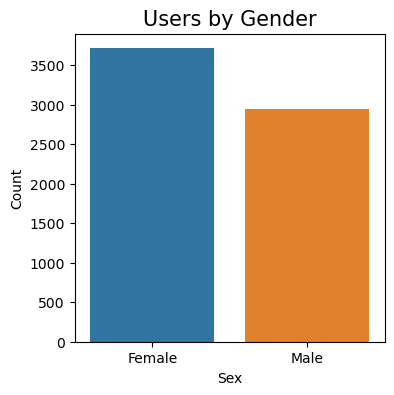

In [36]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=ldata)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

Female users are predominant in the use of Licinopril solution

USERS AND RACE

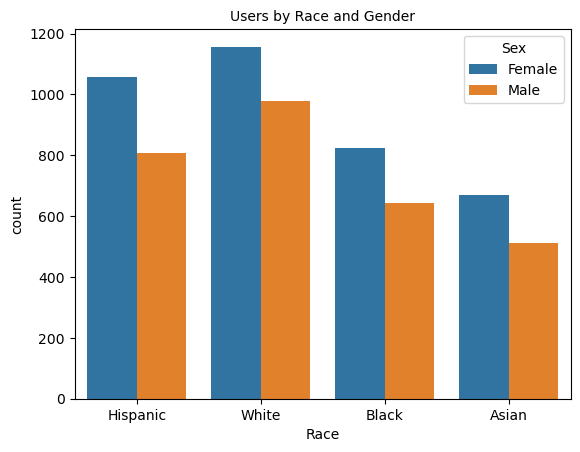

In [37]:
sns.countplot(x='Race',hue='Sex',data=ldata)
plt.title("Users by Race and Gender", fontsize = 10)
plt.show()

users belongs to white race is the predominant users followed by hispanic.
In each race female gender is the predominant users.

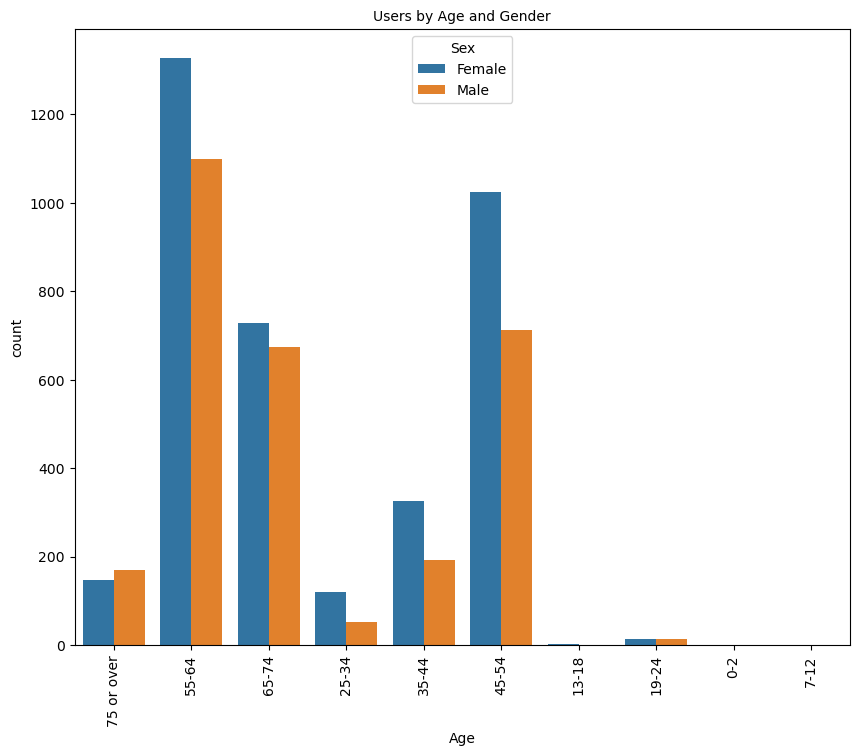

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='Age',hue='Sex',data=ldata)
plt.title("Users by Age and Gender", fontsize = 10)
plt.xticks(rotation=90,fontsize=10)
plt.show()

users age group 55-64 consumes more drugs followed by the age group 45-54.In each age group female gender is the predominant user,except the age group 75 or over.

EFFECTIVENESS OF DRUG

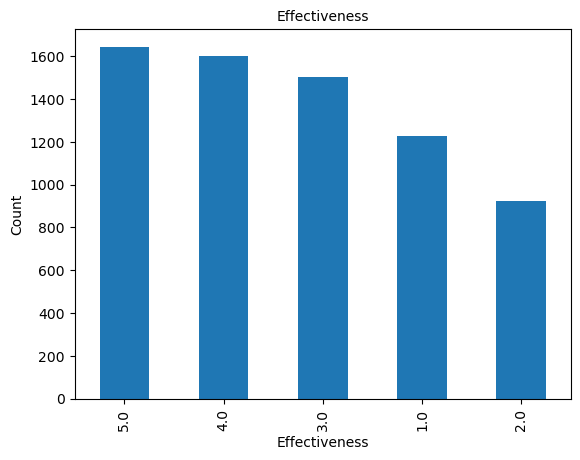

In [39]:
ldata['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

The drug is fairly effective with more than 1600 users voting a 4 rating and 5 rating  to it.

SIDE EFFECT AND DRUG

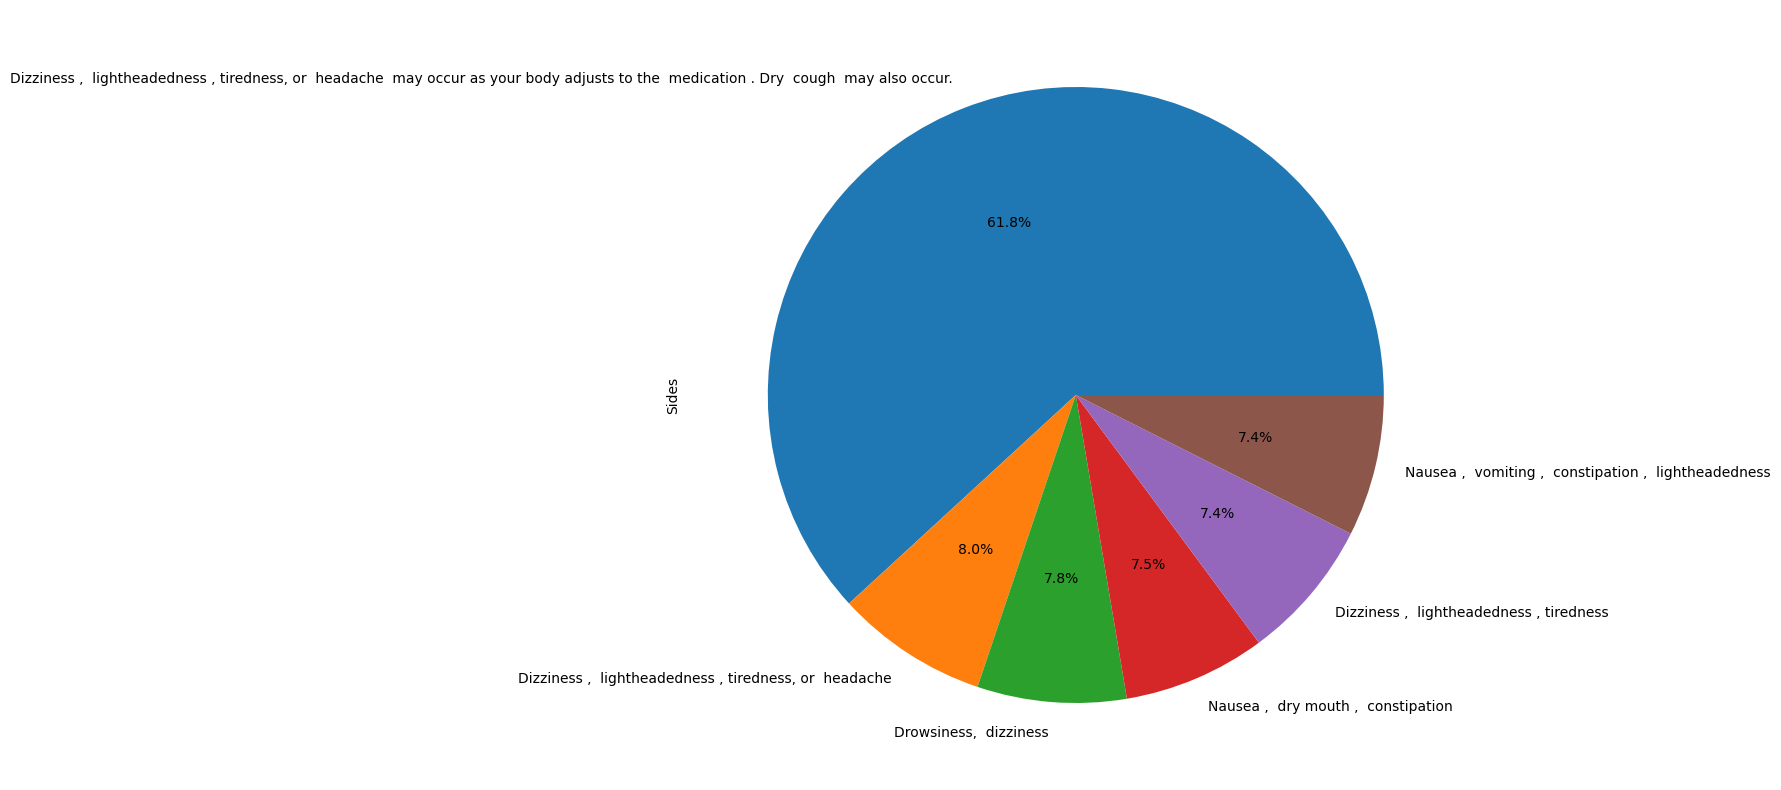

In [40]:
plt.figure(figsize=(10,10))
ldata['Sides'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

61% of users reported extreme si.de effects

AGE AND SIDE EFFECTS

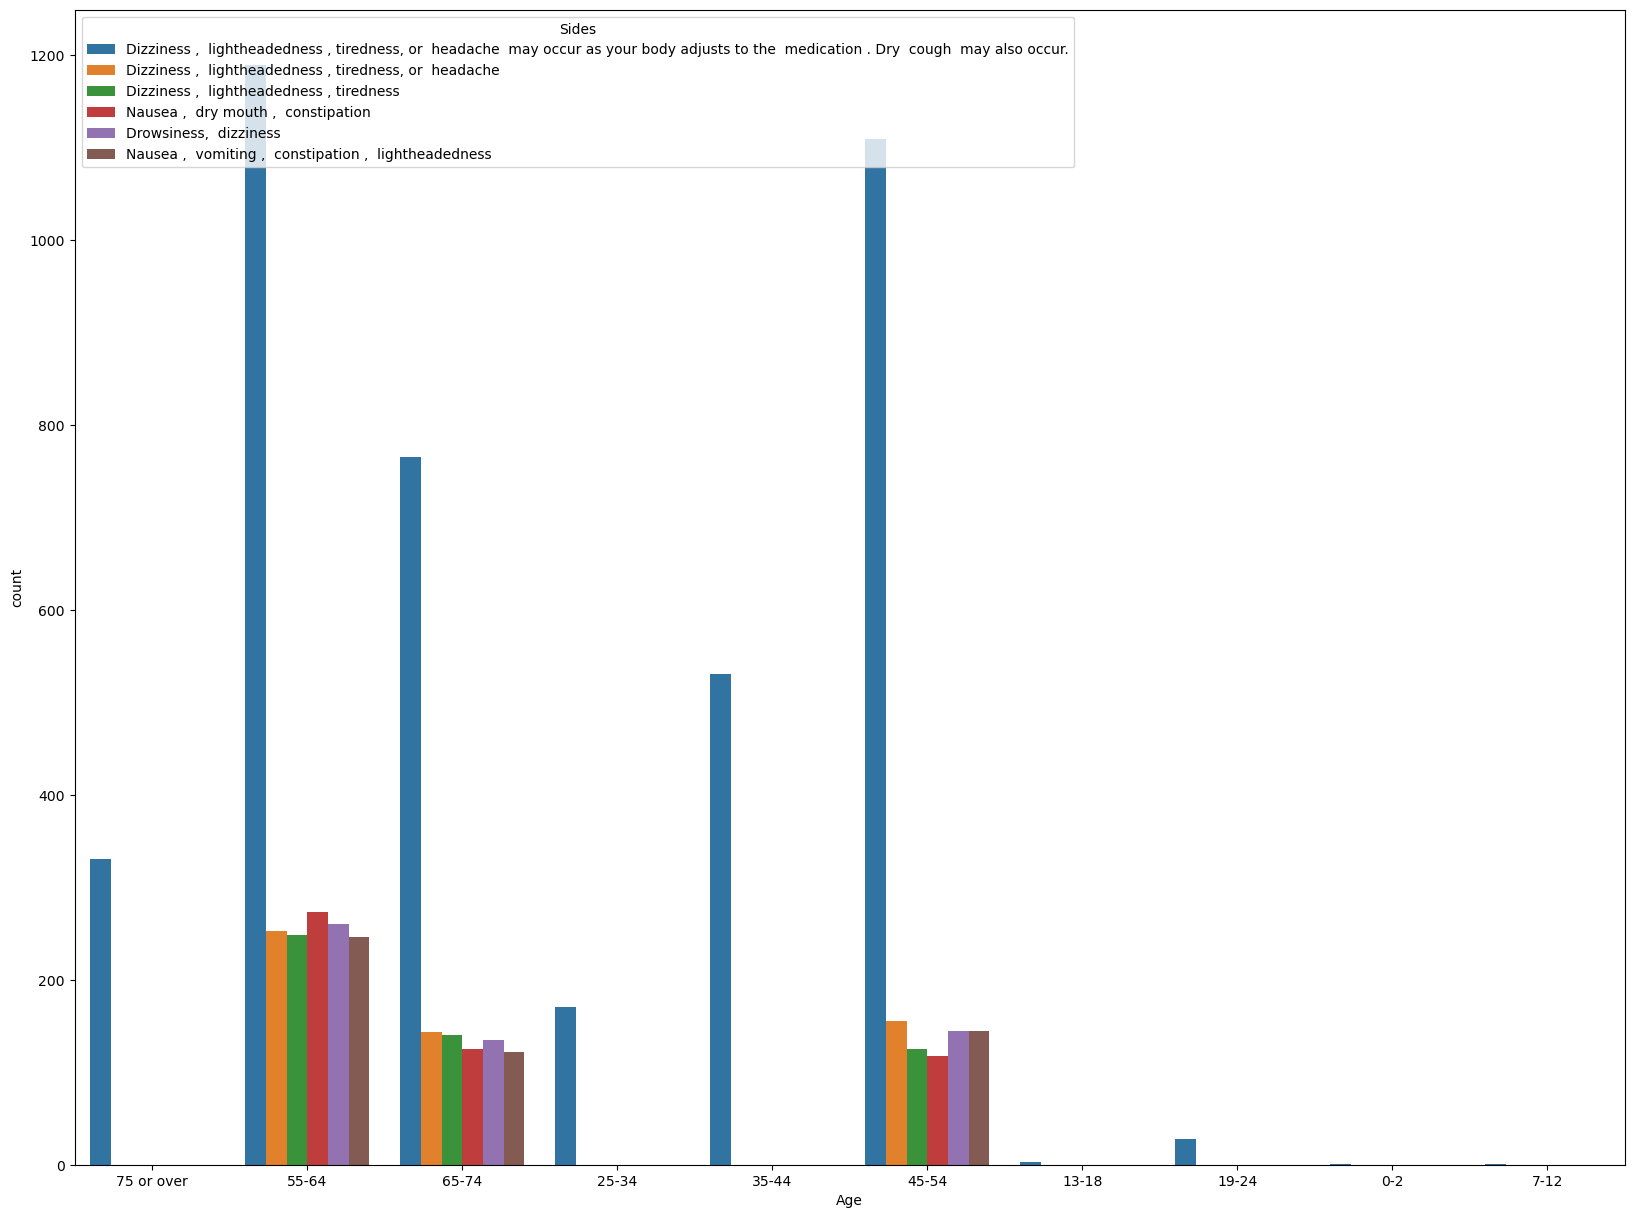

In [41]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Age',hue='Sides',data=ldata);

55-64 age group has opinionated that they had extreme side effects.

RACE AND SIDE EFFECT

<AxesSubplot:xlabel='Race', ylabel='count'>

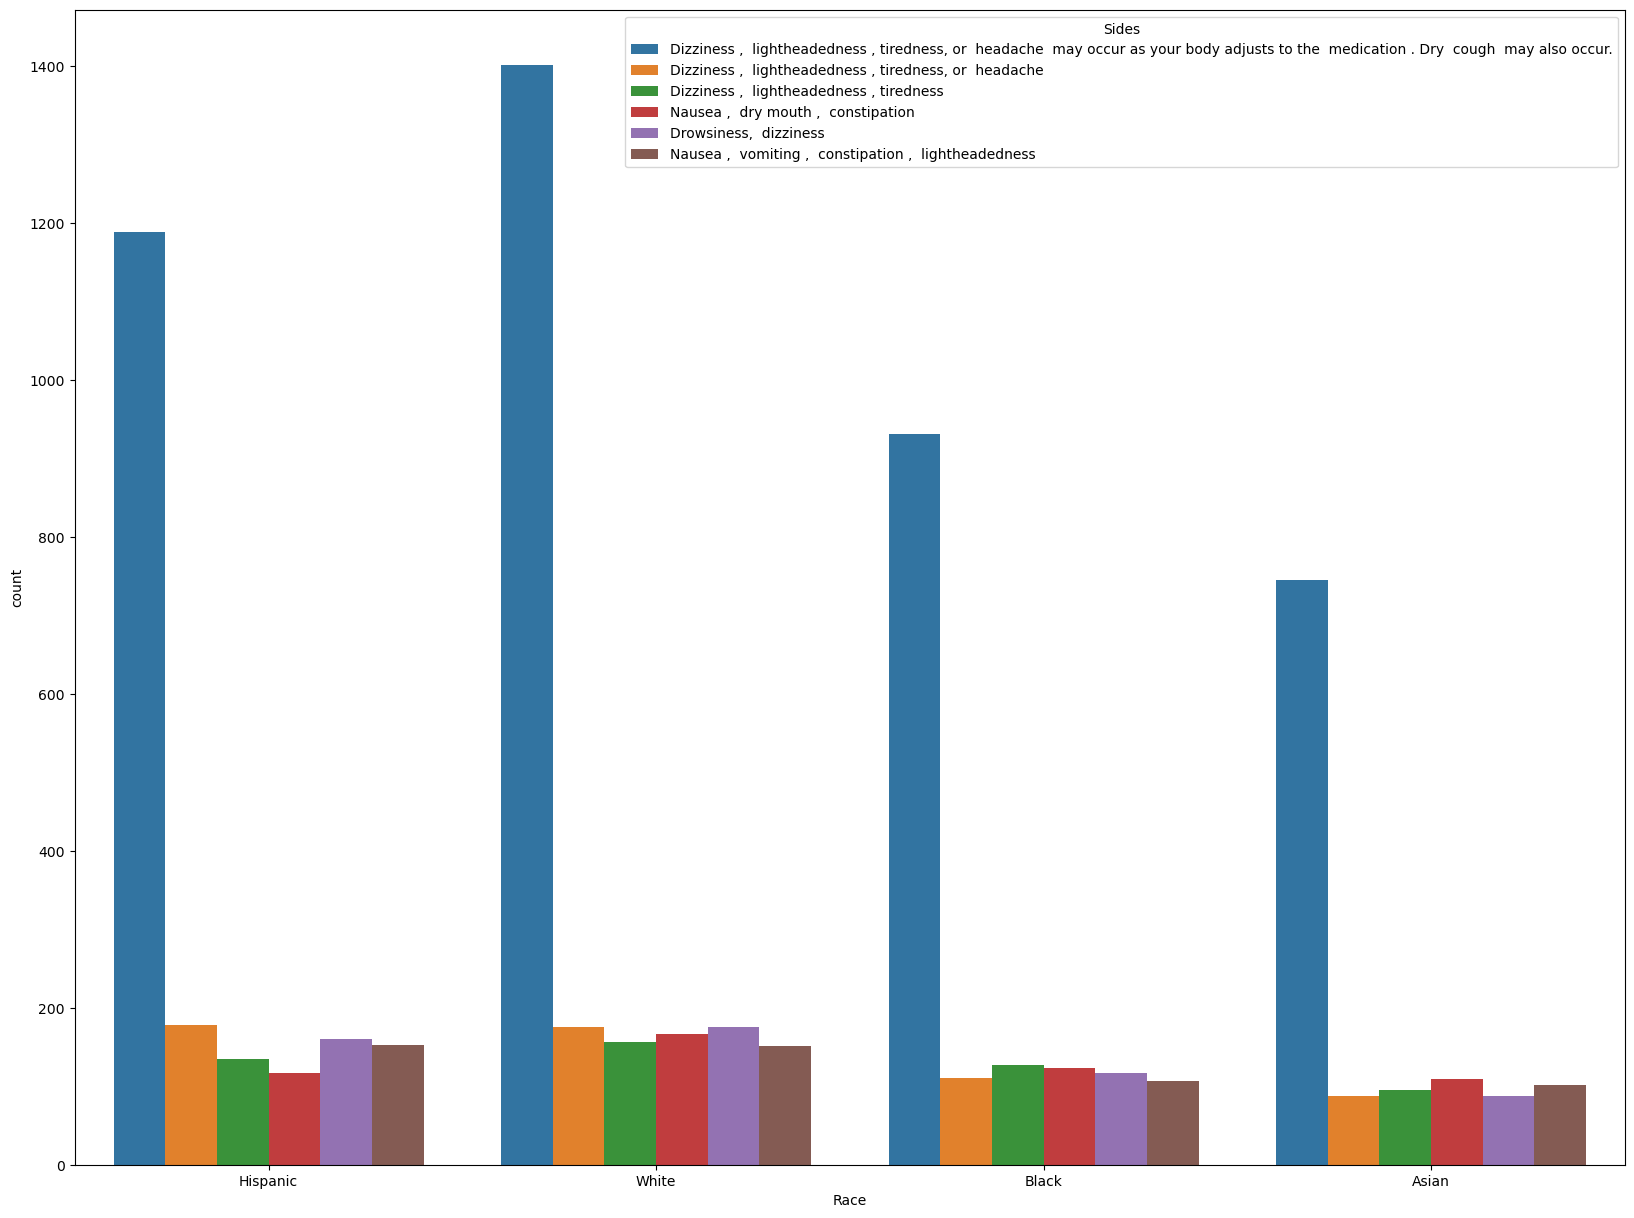

In [42]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Race',hue='Sides',data=ldata)

White and Hispanic users reported more extreme side effects

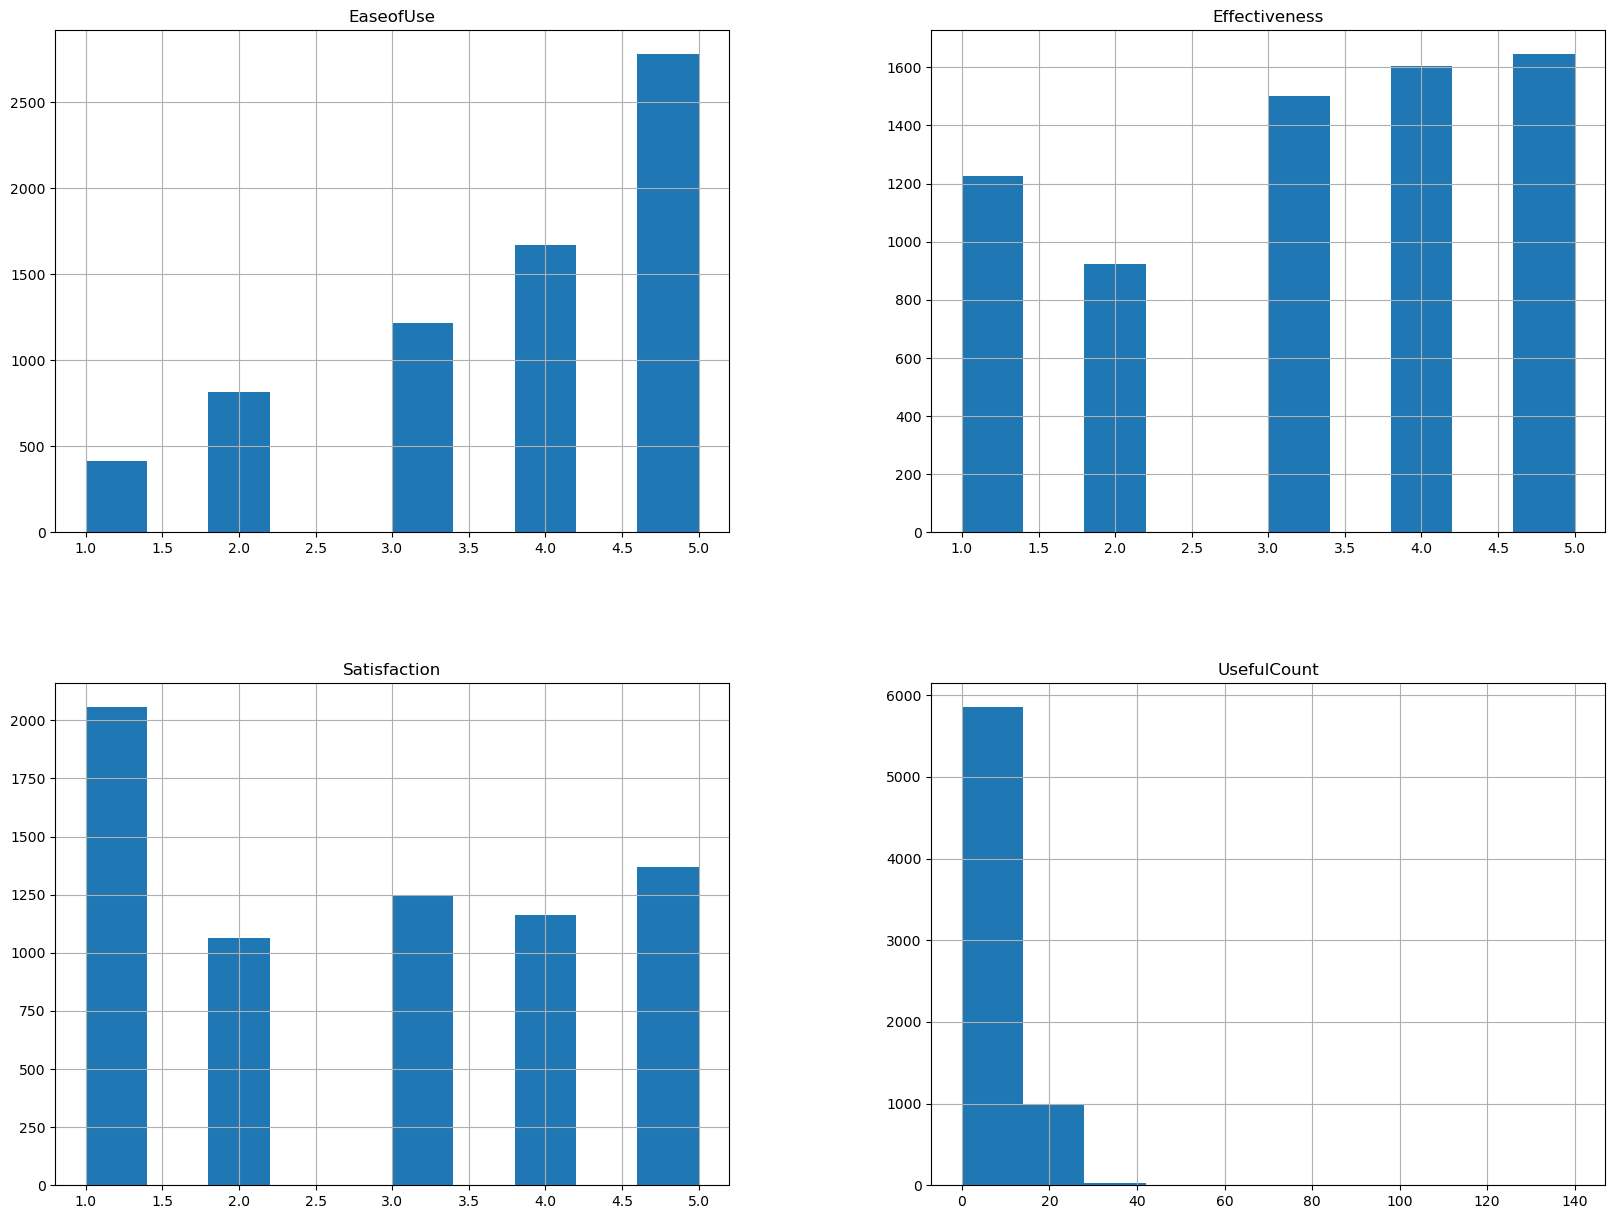

In [43]:
# Potting Numerical Values (UsefulCount, easeofuse, effectiveness and satisfaction )


ldata.hist(column=["EaseofUse","Effectiveness","Satisfaction","UsefulCount"],figsize=(20,15))
plt.show()

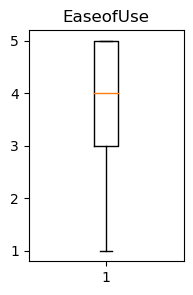

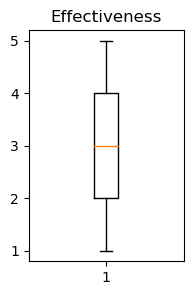

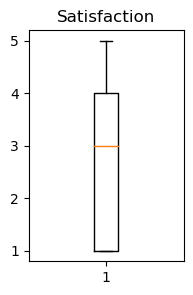

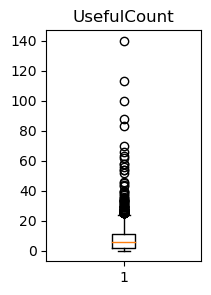

In [44]:
# plotting box plot for Outlier Handling

for i in ["EaseofUse","Effectiveness","Satisfaction","UsefulCount"]:
    plt.figure(figsize=(2,3))
    plt.title(i)
    plt.boxplot(ldata[i])

In [45]:
# Removing  Outlier from Usefulcount Using IQR

Q1 = ldata.UsefulCount.quantile(0.25)
Q3 = ldata.UsefulCount.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

-11.5 24.5 9.0


In [46]:
ldata.loc[ldata['UsefulCount']>max_limit,'UsefulCount']=24

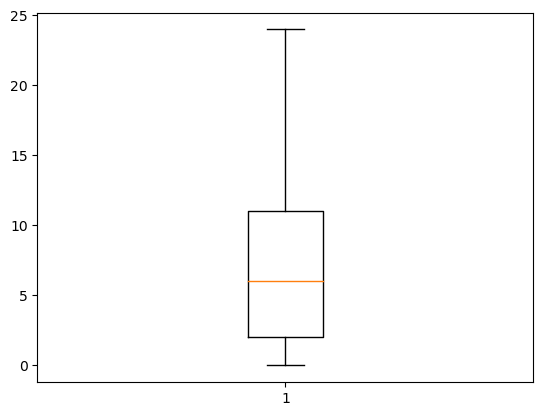

In [47]:
plt.boxplot(ldata["UsefulCount"]);

In [48]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
ldata['Sideeffect'] = ldata['Satisfaction'].map(mapping)

In [49]:
ldata

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year,Sideeffect
9197,Dillon,Hispanic,NaN,High Blood Pressure,2/29/2020,lisinopril solution,6873.0,5.0,5.0,No Script or health Insurance needed to place ...,5.0,NaN,"Dizziness , lightheadedness , tiredness, or ...",14.0,2020.0,1
9203,Richard,White,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873.0,5.0,4.0,I have developed a very itch rash on my body f...,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0,2020.0,2
9209,Quinton,Hispanic,55-64,High Blood Pressure,1/14/2020,lisinopril solution,6873.0,4.0,5.0,"tried alternative medicine Beet root, hibiscus...",4.0,Male,"Dizziness , lightheadedness , tiredness, or ...",3.0,2020.0,2
9215,Marcelo,White,65-74,High Blood Pressure,10/17/2019,lisinopril solution,6873.0,5.0,5.0,Have been taking 10 mg doses per day for over ...,5.0,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0,2019.0,1
9221,Jann,White,55-64,High Blood Pressure,10/13/2019,lisinopril solution,6873.0,2.0,4.0,I don't like that I'm taking this and not know...,2.0,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0,2019.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402749,Twana,Black,45-54,High Blood Pressure,2010-02-18,lisinopril solution,150771.0,5.0,4.0,good,1.0,Female,"Nausea , vomiting , constipation , lighthea...",4.0,2010.0,5
402751,Juliane,Hispanic,65-74,Birth Control,2013-12-18,lisinopril solution,151637.0,5.0,4.0,good,1.0,Female,"Nausea , dry mouth , constipation",14.0,2013.0,5
402754,Oda,Hispanic,65-74,High Blood Pressure,2014-02-07,lisinopril solution,156549.0,2.0,5.0,good,4.0,Male,"Nausea , vomiting , constipation , lighthea...",15.0,2014.0,2
402789,Roy,White,45-54,Depression,2012-05-10,lisinopril solution,152646.0,4.0,5.0,good,5.0,Female,"Dizziness , lightheadedness , tiredness, or ...",13.0,2012.0,1


## Cleaning Review column

Training an algoithm on the parent dataset. The algorithm will get trained on satisfaction and reviews, which means, it will identify which reviews or specifically word consitutes positive review ( satisfaction > 3) and which one consitute negative reviews (satisfaction < 3)Rank the reviews as either positive or negative.Review rank for entries where satisfaction > 3 is 1 and for satisfaction < 3 is 0. 

In [50]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
if data['Reviews'].dtype.kind == "O":
        data['Reviews'] = data['Reviews'].str.strip()

In [52]:
data['Reviews']= data['Reviews'].astype(str)

In [53]:
from spacy.cli import download as spacy_download
spacy_download("en_core_web_sm")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [54]:
%%time

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
STOPWORDS = set(sklearn_stop_words).union(set(stopwords.words("english")))

Wall time: 903 ms


In [55]:
# defining a function called clean review which clean the reveiw column

def clean_review(text, STOPWORDS=STOPWORDS, nlp=nlp):
    """Cleans up text"""
    
    def rep_emo(text, placeholder_pos=' happyemoticon ', placeholder_neg=' sademoticon '):
        """Replace emoticons"""
        
        emoticons_pos = [":)", ":-)", ":p", ":-p", ":P", ":-P", ":D",":-D", ":]", ":-]", ";)", ";-)",
                         ";p", ";-p", ";P", ";-P", ";D", ";-D", ";]", ";-]", "=)", "=-)", "<3"]
        emoticons_neg = [":o", ":-o", ":O", ":-O", ":(", ":-(", ":c", ":-c", ":C", ":-C", ":[", ":-[",
                         ":/", ":-/", ":\\", ":-\\", ":n", ":-n", ":u", ":-u", "=(", "=-(", ":$", ":-$"]
        for e in emoticons_pos:
            text = text.replace(e, placeholder_pos)

        for e in emoticons_neg:
                text = text.replace(e, placeholder_neg)   
        return text

    def rep_punct(text):
        """Replace all punctuation with space"""
        for c in string.punctuation:
            text = text.replace(c, " ")
        return text

    def rem_stop_num(text):
        """Remove stop words and anything starting with number"""
        return " ".join(word for word in text.split() if word not in STOPWORDS and not word[0].isdigit())

    def lemmatize(text):
        """Return lemmas of tokens in text"""
        return " ".join(tok.lemma_.lower().strip() for tok in nlp(text) if tok.lemma_ != "-PRON-")  

    return lemmatize(rem_stop_num(rep_punct(rep_emo(text))))
    



In [56]:
%%time
data3 = data[["Satisfaction", "Reviews"]]
data3["Reviews"] = data3["Reviews"].apply(clean_review)
data3["Reviews"].replace("", np.nan, inplace=True)
data3.dropna(inplace=True)

review column is cleaned now. generate a new column satisfaction1

In [57]:
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

In [58]:
data3["Satisfaction1"] = data3["Satisfaction"].apply(relabel)

Fitting a model for processing text

In [59]:
train_set, test_set = train_test_split(data3, test_size=0.25, random_state=0, stratify=data3["Satisfaction1"])
train_index = train_set.index
test_index = test_set.index


In [60]:
%%time
train_set = train_set[train_set["Satisfaction1"] != 1]
test_set = test_set[test_set["Satisfaction1"] != 1]

vectorizer = TfidfVectorizer(max_features=3000, min_df=10, max_df=0.8)
X_train = vectorizer.fit_transform(train_set["Reviews"]).toarray()
X_test = vectorizer.transform(test_set["Reviews"]).toarray()
y_train = train_set["Satisfaction1"].values
y_test = test_set["Satisfaction1"].values

model = RandomForestClassifier(min_samples_split=6, random_state=0)
model.fit(X_train, y_train)


Wall time: 42min 53s


RandomForestClassifier(min_samples_split=6, random_state=0)

In [61]:
acc_train = accuracy_score(y_train, model.predict(X_train))
print(f"\nAccuracy in train set: {acc_train:.2}")
predictions = model.predict(X_test)
acc_test = accuracy_score(y_test, predictions)
print(f"\nAccuracy in test  set: {acc_test:.2}\n")
print(classification_report(y_test, predictions))


Accuracy in train set: 0.94

Accuracy in test  set: 0.8

              precision    recall  f1-score   support

           0       0.82      0.74      0.77     36092
           2       0.79      0.86      0.82     41176

    accuracy                           0.80     77268
   macro avg       0.80      0.80      0.80     77268
weighted avg       0.80      0.80      0.80     77268



got an accuracy of 80% in test and 99 % in train now cleaning the review column of lisino pril solution

In [62]:
ldata["Reviews"] =ldata["Reviews"].astype(str)

In [63]:
ldata["Reviews"] = ldata["Reviews"].apply(clean_review)

generating rank column

In [64]:
# defining a function which assigns ranks 0 and 1

def predict_rank(text):
    cleaned_text = [clean_review(text)]
    padded_text = vectorizer.transform(cleaned_text)
    p = model.predict(padded_text)[0]
    if (p == 0):
        return 0
    else :
        return 1
    
def predict_rank1(rank):
    if (rank < 3):
        return 0
    else:
        return 1

In [65]:
ldata['Reviews_Rank'] = ldata['Satisfaction']
ldata.loc[ldata['Satisfaction'] < 3, 'Reviews_Rank'] = ldata.loc[ldata['Satisfaction'] < 3, 'Reviews_Rank'].apply(predict_rank1)
ldata.loc[ldata['Satisfaction'] > 3, 'Reviews_Rank'] = ldata.loc[ldata['Satisfaction'] > 3, 'Reviews_Rank'].apply(predict_rank1)
ldata.loc[ldata['Satisfaction'] == 3, 'Reviews_Rank'] = ldata.loc[ldata['Satisfaction'] == 3, 'Reviews'].apply(predict_rank)
ldata['Reviews_Rank'].unique()

array([1., 0.])

In [66]:
ldata = ldata.dropna()

In [67]:
# Removing unvanted columns and columns having unique values.name,drug, drug id,condition,date,ease of use,useful count,sides,year

ldata.drop(['Name','Condition','Date','Drug','DrugId','Sides','UsefulCount','Reviews','Year'], axis=1, inplace = True)

In [68]:
ldata

,Race,Age,EaseofUse,Effectiveness,Satisfaction,Sex,Sideeffect,Reviews_Rank
9203,White,75 or over,5.0,4.0,4.0,Female,2,1.0
9209,Hispanic,55-64,4.0,5.0,4.0,Male,2,1.0
9215,White,65-74,5.0,5.0,5.0,Male,1,1.0
9221,White,55-64,2.0,4.0,2.0,Male,4,0.0
9227,White,55-64,3.0,1.0,1.0,Female,5,0.0
...,...,...,...,...,...,...,...,...
402749,Black,45-54,5.0,4.0,1.0,Female,5,0.0
402751,Hispanic,65-74,5.0,4.0,1.0,Female,5,0.0
402754,Hispanic,65-74,2.0,5.0,4.0,Male,2,1.0
402789,White,45-54,4.0,5.0,5.0,Female,1,1.0


In [69]:
# Encoding race, age, sex columns

ldata = pd.get_dummies(ldata)
ldata.head()

,EaseofUse,Effectiveness,Satisfaction,Sideeffect,Reviews_Rank,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,...,Age_19-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over,Sex_Female,Sex_Male
9203,5.0,4.0,4.0,2,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
9209,4.0,5.0,4.0,2,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
9215,5.0,5.0,5.0,1,1.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9221,2.0,4.0,2.0,4,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
9227,3.0,1.0,1.0,5,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [90]:
# Scaling Effectiveness and easeof use using standard scalar
std = StandardScaler()
ldata[["Effectiveness"]] = std.fit_transform(ldata[["Effectiveness"]])
ldata[["EaseofUse"]] = std.fit_transform(ldata[["EaseofUse"]])
ldata[["Satisfaction"]] = std.fit_transform(ldata[["Satisfaction"]])
ldata.head(5)

,EaseofUse,Effectiveness,Satisfaction,Sideeffect,Reviews_Rank,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,...,Age_19-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over,Sex_Female,Sex_Male
9203,0.95875,0.559090,0.784912,2,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
9209,0.15341,1.267907,0.784912,2,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
9215,0.95875,1.267907,1.448620,1,1.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9221,-1.45727,0.559090,-0.542504,4,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
9227,-0.65193,-1.567362,-1.206212,5,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [91]:
final_data = ldata.copy()

In [92]:
 #exporting the processed data set into a excel sheet for modeling
ldata.to_excel("modeling_data.xlsx")

## MODELING 

In [93]:
#splitting into dependant and independent variables
x1 = final_data.drop(["Sideeffect"],axis = 1)
y1 = final_data["Sideeffect"]

In [94]:
# spliting into training and testing 

from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,random_state = 42,test_size=0.2)

In [95]:
# Importing required packeges for classification models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [96]:
models = [['LogisticRegression :', LogisticRegression()],
          ['DecisionTreeClassifier :', DecisionTreeClassifier()],
          ['RandomForestClassifier :', RandomForestClassifier()],
          ['GradientBoostingClassifier   :', GradientBoostingClassifier()],
          ['KNeighborsClassifier :', KNeighborsClassifier()],
          ['SVC :', SVC()]]

In [97]:
for name, model in models:
    model = model
    model.fit(x_train1,y_train1)
    y_train_pred = model.predict(x_test1)
    print(name, accuracy_score(y_test1, y_train_pred))    
    print('Accuracy =',accuracy_score(y_test1,y_train_pred))
    print('Precision =',precision_score(y_test1,y_train_pred,average='micro'))
    print('Recall =',recall_score(y_test1,y_train_pred,average='micro'))
    print('F1 Score =',f1_score(y_test1,y_train_pred,average='micro'))

LogisticRegression : 1.0
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
DecisionTreeClassifier : 1.0
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
RandomForestClassifier : 1.0
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
GradientBoostingClassifier   : 1.0
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
KNeighborsClassifier : 0.7668433005299016
Accuracy = 0.7668433005299016
Precision = 0.7668433005299016
Recall = 0.7668433005299016
F1 Score = 0.7668433005299015
SVC : 1.0
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
